In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 1. Read in PCOS_infertility dataset

* 541 patients
* 6 columns
* only a single data point missing
* all qunatitative data
* `PCOS (Y/N)` is 0 or 1
* two identifiers: `Sl. No` and `Patient File No.`

In [4]:
dataset = pd.read_csv('./data/PCOS_infertility.csv')
print(dataset.shape)
dataset.head(2)

(541, 6)


Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53

In [6]:
dataset.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
AMH(ng/mL)                 object
dtype: object

#### AMH is object, however, it contains numbers. Converting into float.

In [12]:
dataset.loc[dataset['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan
dataset['AMH(ng/mL)'] = dataset['AMH(ng/mL)'].astype(float)

In [13]:
dataset.describe()

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
count  541.000000        541.000000  541.000000              541.000000   
mean   271.000000      10271.000000    0.327172              664.549235   
std    156.317519        156.317519    0.469615             3348.920576   
min      1.000000      10001.000000    0.000000                1.300000   
25%    136.000000      10136.000000    0.000000                1.990000   
50%    271.000000      10271.000000    0.000000               20.000000   
75%    406.000000      10406.000000    1.000000              297.210000   
max    541.000000      10541.000000    1.000000            32460.970000   

       II    beta-HCG(mIU/mL)  AMH(ng/mL)  
count              541.000000  540.000000  
mean               238.229518    5.624191  
std               1603.826221    5.881608  
min                  0.110417    0.100000  
25%                  1.990000    2.010000  
50%                  1.990000    3.700000  
75%                 97.630000    6.925000  
max              25000.000000   66.000000

#### Only a single missing data point in PCOS_infertility

# 2. Read in second dataset, PCOS_data_without_infertility

* 44 columns
* 541 patients
* two identifiers, `Sl. No` and `Patient File No.`
* `Sl. No` is global identifiers across the two datasets
* seems to contain all measures from the other dataset
* will proceed with this dataset at first

In [26]:
dataset2 = pd.read_excel('./data/PCOS_data_without_infertility.xlsx', sheet_name="Full_new")
dataset2.drop(columns = 'Unnamed: 44', inplace = True)
print(dataset2.shape)
dataset2.head(2)

(541, 44)


Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0     1.0               1.0         0.0        28.0         44.6        152.0   
1     2.0               2.0         0.0        36.0         65.0        161.5   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
0  19.300000         15.0              78.0              22.0     10.48   
1  24.921163         15.0              74.0              20.0     11.70   

   Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0         2.0                 5.0                    7.0            0.0   
1         2.0                 5.0                   11.0            1.0   

   No. of aborptions    I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  \
0                0.0                    1.99                   1.99   
1                0.0                   60.80                   1.99   

   FSH(mIU/mL)  LH(mIU/mL)    FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
0         7.95        3.68  2.160326       36.0         30.0         0.833333   
1         6.73        1.09  6.174312       38.0         32.0         0.842105   

   TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
0         0.68       2.07       45.16            17.1        0.57        92.0   
1         3.16       1.53       20.09            61.3        0.97        92.0   

   Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
0               0.0               0.0                   0.0             0.0   
1               0.0               0.0                   0.0             0.0   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0           0.0              1.0                0.0                110.0   
1           0.0              0.0                0.0                120.0   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                  80.0               3.0               3.0   
1                  70.0               3.0               5.0   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7

In [30]:
dataset2.dtypes

Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [34]:
# some data cleaning
dataset2.loc[dataset2['II    beta-HCG(mIU/mL)'] == '1.99.', 'II    beta-HCG(mIU/mL)'] = 1.99
dataset2['II    beta-HCG(mIU/mL)'] = dataset2['II    beta-HCG(mIU/mL)'].astype(float)

dataset2.loc[dataset2['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan
dataset2['AMH(ng/mL)'] = dataset2['AMH(ng/mL)'].astype(float)

In [37]:
dataset2.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285   
min     137.000000   12.417882    11.000000         13.000000   
25%     152.000000   21.641274    13.000000         72.000000   
50%     156.000000   24.238227    14.000000         72.000000   
75%     160.000000   26.634958    15.000000         74.000000   
max     180.000000   38.900000    18.000000         82.000000   

       RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  Cycle length(days)  \
count        541.000000  541.000000  541.000000           541.00000   
mean          19.243993   11.160037    2.560074             4.94085   
std            1.688629    0.866904    0.901950             1.49202   
min           16.000000    8.500000    2.000000             0.00000   
25%           18.000000   10.500000    2.000000             4.00000   
50%           18.000000   11.000000    2.000000             5.00000   
75%           20.000000   11.700000    4.000000             5.00000   
max           28.000000   14.800000    5.000000            12.00000   

       Marraige Status (Yrs)  Pregnant(Y/N)  No. of aborptions  \
count             540.000000     541.000000         541.000000   
mean                7.680926       0.380776           0.288355   
std                 4.803835       0.486027           0.692575   
min                 0.000000       0.000000           0.000000   
25%                 4.000000       0.000000           0.000000   
50%                 7.000000       0.000000           0.000000   
75%                10.000000       1.000000           0.000000   
max                30.000000       1.000000           5.000000   

         I   beta-HCG(mIU/mL)  II    beta-HCG(mIU/mL)  FSH(mIU/mL)  \
count              541.000000              541.000000   541.000000   
mean               664.549235              238.232993    14.601832   
std               3348.920576             1603.825706   217.022081   
min                  1.300000                0.990000     0.210000   
25%                  1.990000                1.990000     3.300000   
50%                 20.000000                1.990000     4.850000   
75%                297.210000               97.630000     6.410000   
max              32460.970000            25000.000000  5052.000000   

        LH(mIU/mL)       FSH/LH   Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
count   541.000000   541.000000  541.000000   541.000000       541.000000   
mean      6.469919     6.904831   37.992606    33.841035         0.891895   
std      86.673255    60.691822    3.967920     3.596894         0.046326   
min       0.020000     0.002146   26.000000    24.000000         0.755556   
25%       1.020000     1.416244   36.000000    32.000000         0.857143   
50%       2.300000     2.169231   38.000000    34.000000         0.894737   
75%       3.680000     3.959184   40.000000    36.000000         0.928571   
max    2018.000000  1372.826087   48.000000    47.000000         0.979167   

       TSH (mIU/L)  AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
count   541.000000  540.000000  541.000000      541.000000  541.000000   
mean      2.981281    5.624191  

# 3. Histograms of data distributions

## Dataset 1

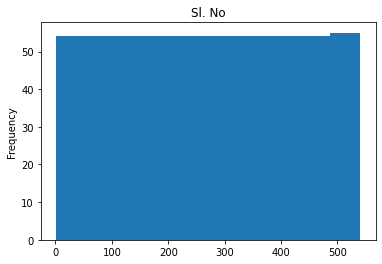

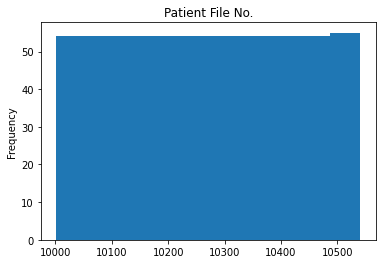

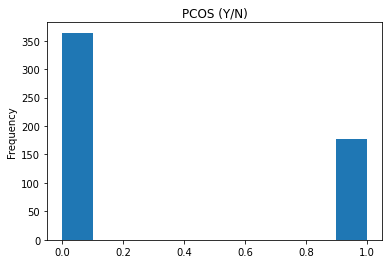

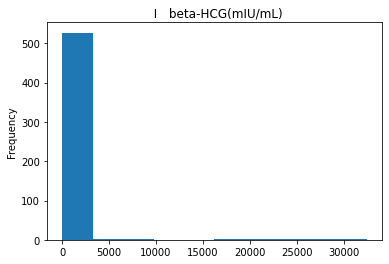

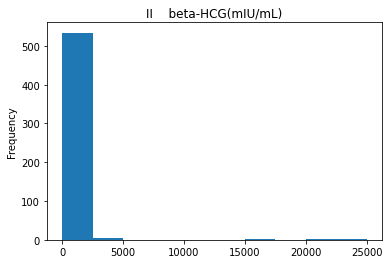

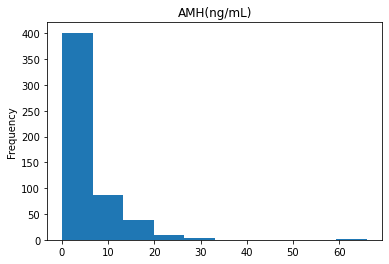

In [35]:
# Dataset 1
for col in dataset.columns:
    dataset[col].plot(kind = 'hist')
    plt.title(col)
    plt.show()

## Dataset2

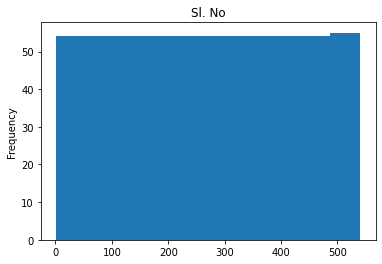

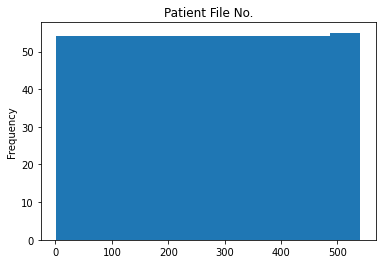

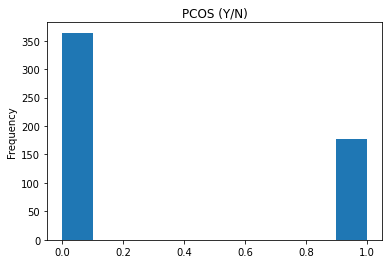

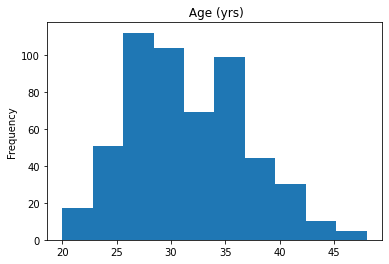

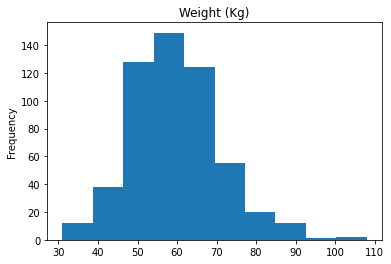

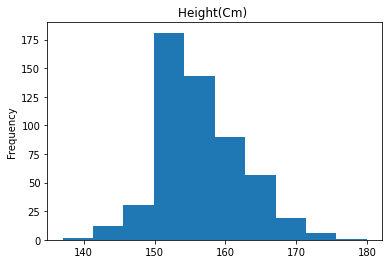

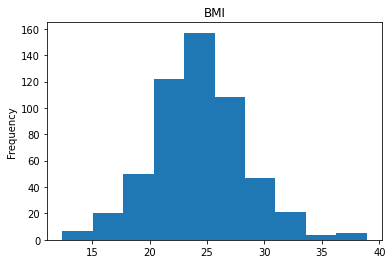

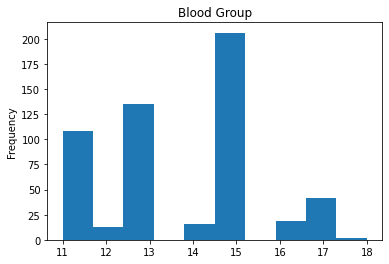

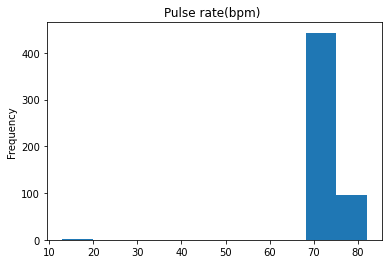

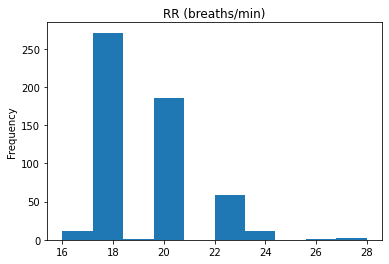

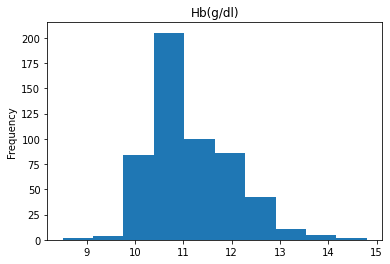

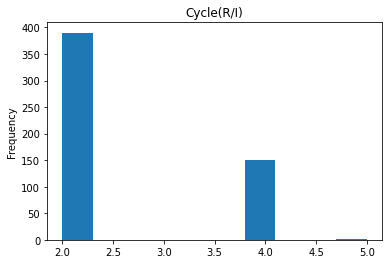

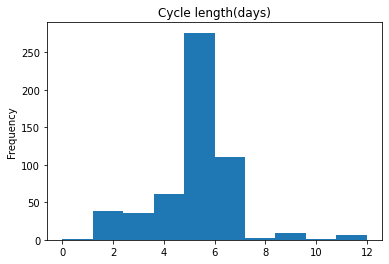

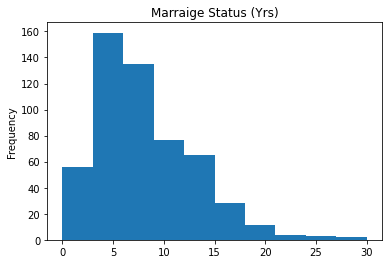

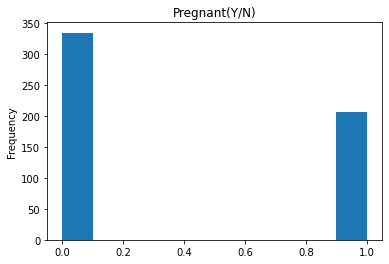

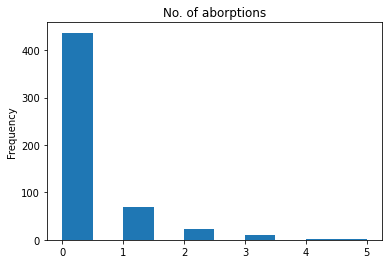

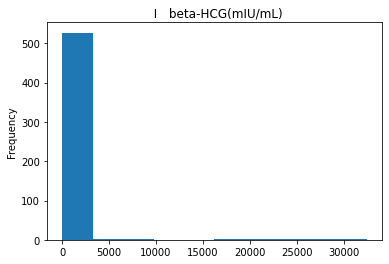

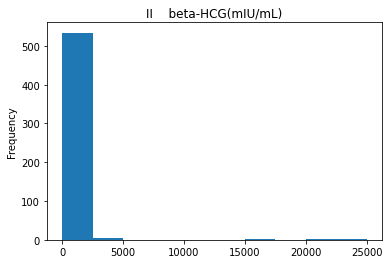

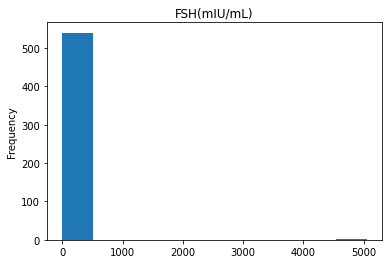

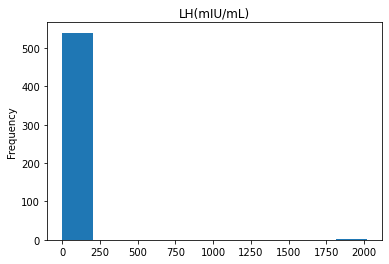

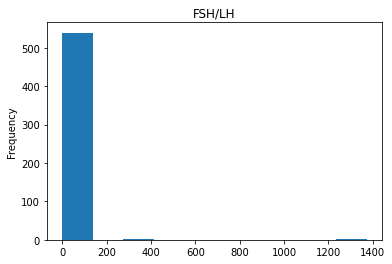

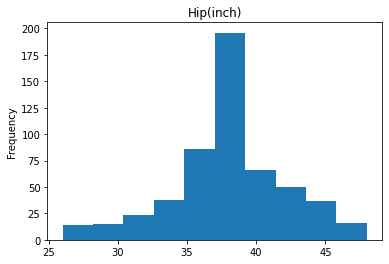

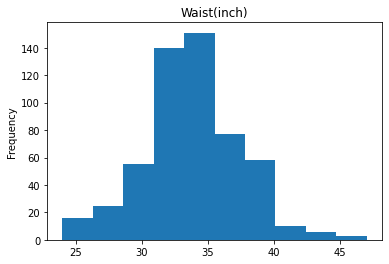

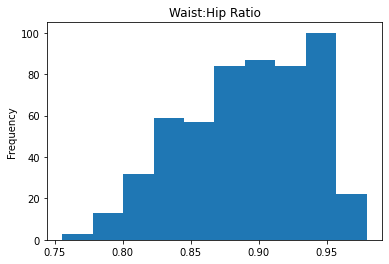

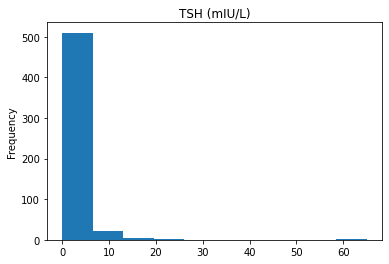

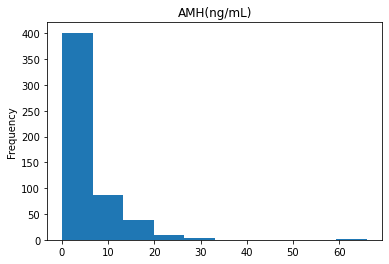

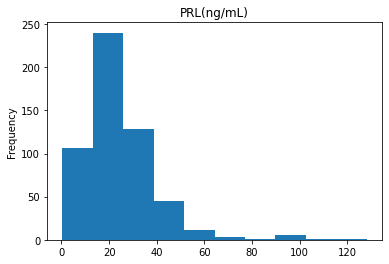

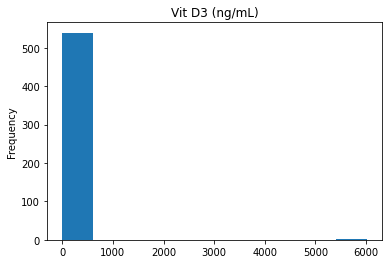

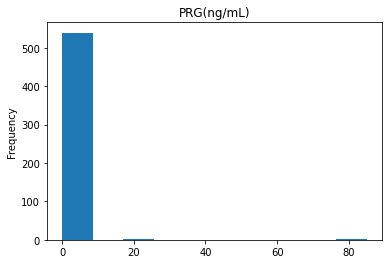

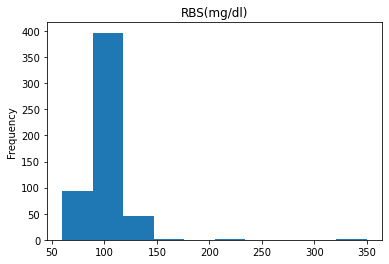

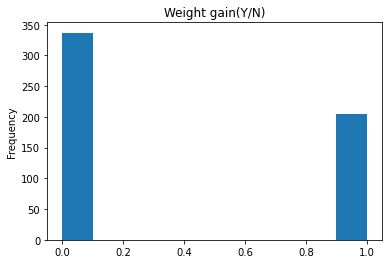

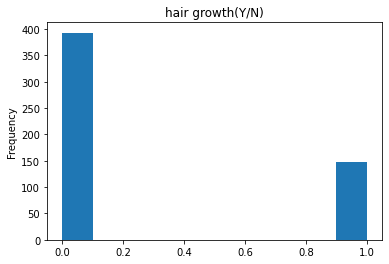

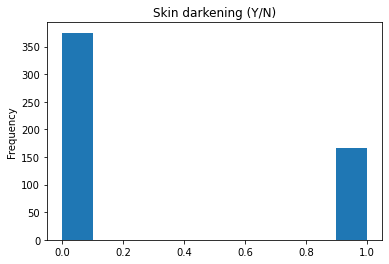

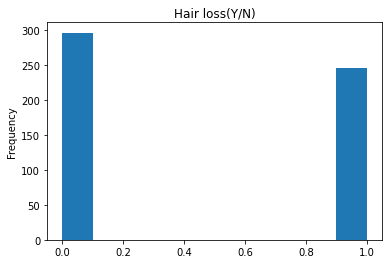

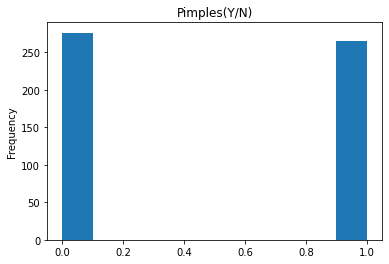

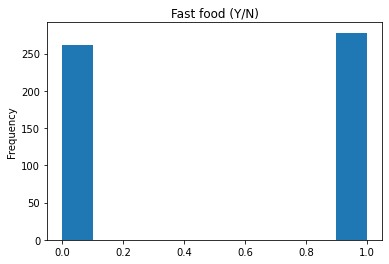

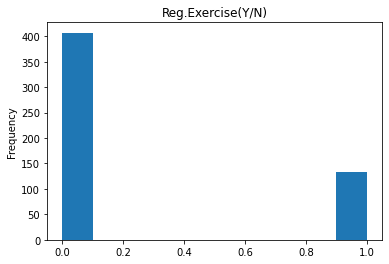

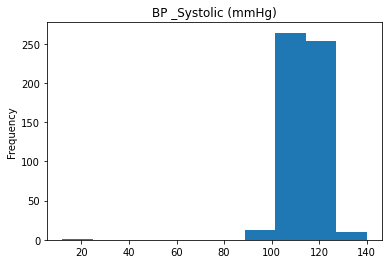

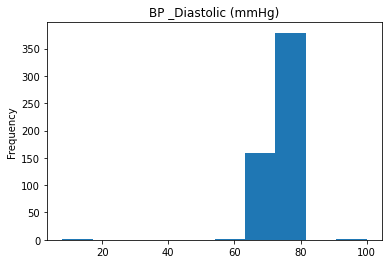

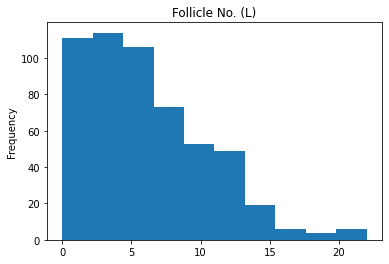

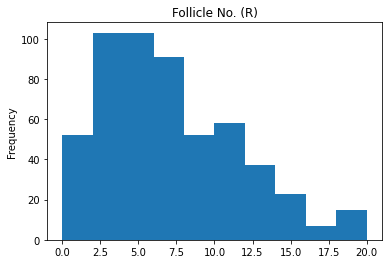

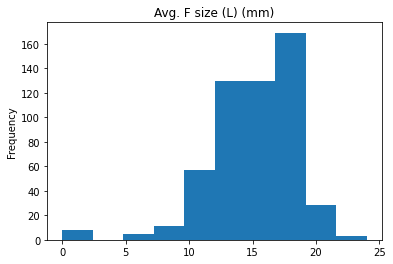

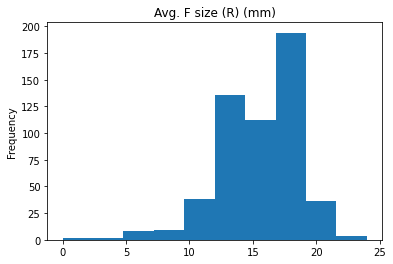

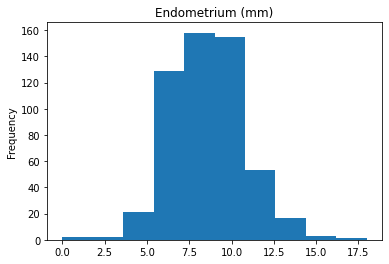

In [36]:
for col in dataset2.columns:
    dataset2[col].plot(kind = 'hist')
    plt.title(col)
    plt.show()

# 4. Correlation plot

In [39]:
# FSH doesn't show high correlation with anything
dataset2.corr(method='pearson')

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  \
Sl. No                  1.000000          1.000000    0.060998    0.067133   
Patient File No.        1.000000          1.000000    0.060998    0.067133   
PCOS (Y/N)              0.060998          0.060998    1.000000   -0.168513   
 Age (yrs)              0.067133          0.067133   -0.168513    1.000000   
Weight (Kg)            -0.082823         -0.082823    0.211938   -0.029734   
Height(Cm)             -0.011700         -0.011700    0.068254   -0.119819   
BMI                    -0.083578         -0.083578    0.199534    0.021261   
Blood Group             0.001705          0.001705    0.036433   -0.010954   
Pulse rate(bpm)        -0.044533         -0.044533    0.091821    0.045831   
RR (breaths/min)       -0.015196         -0.015196    0.036928    0.087382   
Hb(g/dl)               -0.088681         -0.088681    0.087170   -0.021558   
Cycle(R/I)             -0.022959         -0.022959    0.401644   -0.085943   
Cycle length(days)     -0.121856         -0.121856   -0.178480    0.055918   
Marraige Status (Yrs)  -0.019416         -0.019416   -0.112897    0.662080   
Pregnant(Y/N)           0.038878          0.038878   -0.027565   -0.044165   
No. of aborptions      -0.107131         -0.107131   -0.057158    0.220794   
  I   beta-HCG(mIU/mL) -0.015285         -0.015285   -0.027617    0.008148   
II    beta-HCG(mIU/mL) -0.037065         -0.037065    0.012760    0.043054   
FSH(mIU/mL)             0.016609          0.016609   -0.030319   -0.017794   
LH(mIU/mL)              0.050818          0.050818    0.063879    0.000467   
FSH/LH                  0.014280          0.014280   -0.018336    0.012464   
Hip(inch)              -0.328816         -0.328816    0.162297   -0.002784   
Waist(inch)            -0.048228         -0.048228    0.164598    0.035779   
Waist:Hip Ratio         0.543779          0.543779    0.012386    0.068413   
TSH (mIU/L)            -0.073970         -0.073970   -0.010140    0.016740   
AMH(ng/mL)              0.102112          0.102112    0.263863   -0.179648   
PRL(ng/mL)              0.077545          0.077545    0.005143   -0.048757   
Vit D3 (ng/mL)         -0.036627         -0.036627    0.085494    0.004388   
PRG(ng/mL)             -0.056345         -0.056345   -0.043834   -0.021909   
RBS(mg/dl)              0.017168          0.017168    0.048922    0.097008   
Weight gain(Y/N)        0.013139          0.013139    0.441047   -0.028826   
hair growth(Y/N)       -0.052383         -0.052383    0.464667   -0.073434   
Skin darkening (Y/N)    0.028256          0.028256    0.475733   -0.103421   
Hair loss(Y/N)          0.018737          0.018737    0.172879   -0.082784   
Pimples(Y/N)            0.160834          0.160834    0.286077   -0.032921   
Fast food (Y/N)         0.154135          0.154135    0.377933   -0.037694   
Reg.Exercise(Y/N)       0.000110          0.000110    0.065337   -0.025911   
BP _Systolic (mmHg)     0.013399          0.013399    0.007942    0.073587   
BP _Diastolic (mmHg)    0.009798          0.009798    0.038032    0.066788   
Follicle No. (L)        0.049658          0.049658    0.603346   -0.110793   
Follicle No. (R)        0.086969          0.086969    0.648327   -0.159395   
Avg. F size (L) (mm)    0.289706          0.289706    0.132992   -0.016352   
Avg. F size (R) (mm)    0.244608          0.244608    0.097690   -0.079250   
Endometrium (mm)        0.027219          0.027219    0.106648   -0.104238   

                        Weight (Kg)  Height(Cm)        BMI  Blood Group  \
Sl. No                    -0.082823    -0.011700 -0.083578     0.001705   
Patient File No.          -0.082823    -0.011700 -0.083578     0.001705   
PCOS (Y/N)                 0.211938     0.068254  0.199534     0.036433   
 Age (yrs)                -0.029734    -0.119819  0.021261    -0.010954   
Weight (Kg)                1.000000     0.420098  0.901675     0.072682   
Height(Cm)                 0.420098     1.000000 -0.006878     0.

In [40]:
sns.pairplot(data=dataset2, hue = 'PCOS (Y/N)')